#Optimizing Pacific Bluefin Tuna: A Seasonal Data Analysis to Maximize Fishing Success

##Abstract
This data science project focuses on optimizing sportfishing for Pacific Bluefin Tuna off the coast of San Diego by analyzing seasonal patterns and oceanic conditions. The objective is to identify the most favorable time of the year to maximize Pacific Bluefin Tuna catches. The project integrates data from verious sources to explore correlations between sportfishing catches, weather temperatures, and sea surface temperatures. Insights gained from this analysis aim to guide fisherman in planning their expeditions more effectively.

##Introduction
Sportfishing enthusiasts and commercial fishermen are often interested in maximizing their success rate when targeting specific species. In this project, we delve into Pacific Bluefin Tuna sportfishing specifically in order to uncover patterns that can enhance catch success. By analyzing data from the year 2020, we explore correlations between sportfishing catches and environmental factors such as weather and sea surface temperatures.

##Methodology

###Data Collection and Preparation
We begin by importing necessary modules and ensuring all dependencies are met. Datasets include Pacific Bluefin Tuna catches off the coast of California in 2020, San Diego daily weather temperatures, sea surface temperatures off the coast of San Diego, and the history of sea surface temperatures off the coast of San Diego going back to 1916. The data is processed and visualized using tools like calendar heatmaps, scatter plot graphs, and line graphs.

In [ ]:
#!pip install calplot

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calplot
from google.colab import drive
import os
import warnings

pd.set_option('display.max_columns', 500)
drive.mount('/content/driver')

##Plotting
We will attempt to look at various datasets to find conditions that correlate best with successful Pacific Bluefin sportfishing.

1. Firstly, we use a calendar heatmap to visualize Pacific Bluefin Tuna sportfishing catches off the coast of California over the course of 2020.

2. Next, we will explore how warmer weather temperatures correlate with these catches using a calendar heatmap and scatter plot graph.

3. We will place this relationship of warmer weather and Bluefin Tuna catches on a correlation graph to examine whether they are correlated.

4. Next, we will directly compare this data with warmer sea surface temperatures on a calendar heatmap and scatter plot graph to see how the sea surface temperatures correlate with these catches instead.

5. Lastly, we will use historical data to see the trends of ocean warming from the last 100 years to estimate the future of Pacific Bluefin Tuna fishing.


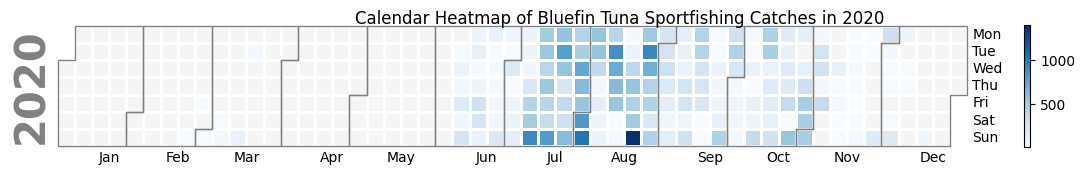

In [28]:
#Reads the dataset of Pacific bluefin tuna recreationally caught off the coast of California in 2020.
dataset = pd.read_csv('/content/driver/MyDrive/BFTunaData/sportfishing.com-pbf-tracking-updated.csv', usecols=[1])

#Generates the date range, extracts the values from the csv and flattens as needed, and creates Series with values.
days = pd.date_range('01/01/2020', periods = 366, freq = 'D')
values = dataset.values.flatten()
values_series = pd.Series(data=values, index=days)

#Plots on a heatmap calendar.
calplot.calplot(values_series, suptitle='Calendar Heatmap of Bluefin Tuna Sportfishing Catches in 2020', suptitle_kws={'x': 0.5, 'y': 1.0}, cmap='Blues', yearlabel_kws={'fontname':'sans-serif'})
plt.show()

warnings.filterwarnings('ignore')



We start by visualizing the Pacific Bluefin Tuna catches in 2020 on a calendar heatmap to get a better overview of seasonality. According to the heatmap, the peak season occurs from late June into August, extending into September and October.

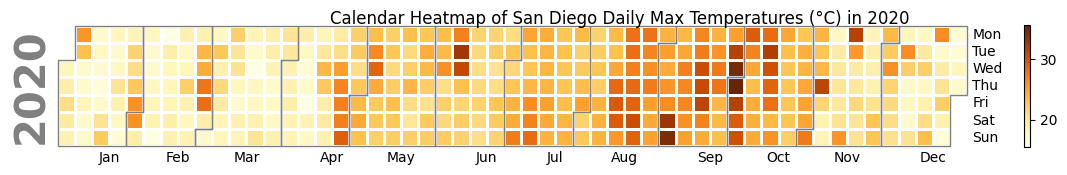

In [29]:
#Calendar heatmap of San Diego temperatures
air_temp_data = pd.read_csv('/content/driver/MyDrive/BFTunaData/sd-weather_2020-01-01_2020-12-31.csv', usecols=[2])

#Generates the date range, extracts the values from the csv and flattens as needed, and creates Series with values.
days = pd.date_range('01/01/2020', periods = 366, freq = 'D')
values = air_temp_data.values.flatten()
values_series = pd.Series(data=values, index=days)

#Plots on a heatmap calendar.
calplot.calplot(values_series, suptitle='Calendar Heatmap of San Diego Daily Max Temperatures (°C) in 2020', suptitle_kws={'x': 0.5, 'y': 1.0}, cmap='YlOrBr', yearlabel_kws={'fontname':'sans-serif'})
plt.show()

warnings.filterwarnings('ignore')

Since the months with the most catches of Bluefin Tuna begin in the summer and last into late fall, it is worth comparing the data to daily max temperatures in San Diego, specifically, to see if there is a correlation since it would be easier for a fisherman to check the weather for the day before setting out to catch tuna.

In [ ]:
#Formats date and time for the catches data
catches = pd.read_csv('/content/driver/MyDrive/BFTunaData/sportfishing.com-pbf-tracking-updated.csv')
catches['datetime'] = catches['Date'].astype('datetime64')
catches.info()

In [ ]:
#Formats date and time on the daily weather data
weather = pd.read_csv('/content/driver/MyDrive/BFTunaData/sd-weather_2020-01-01_2020-12-31.csv')
weather['datetime'] = weather['datetime'].astype('datetime64')
weather.info()

In [6]:
#Merges the catches and the daily weather for the year
merged_catches_weather = pd.merge(catches, weather, on='datetime', how='left')

merged_catches_weather = merged_catches_weather.drop_duplicates(subset='datetime')

catches_weather_df = pd.DataFrame({'date':merged_catches_weather['datetime'], 'Pacific Bluefin Tuna Catches':merged_catches_weather['PBF'], 'San Diego Weather Temperature (°C)':merged_catches_weather['tempmax']})

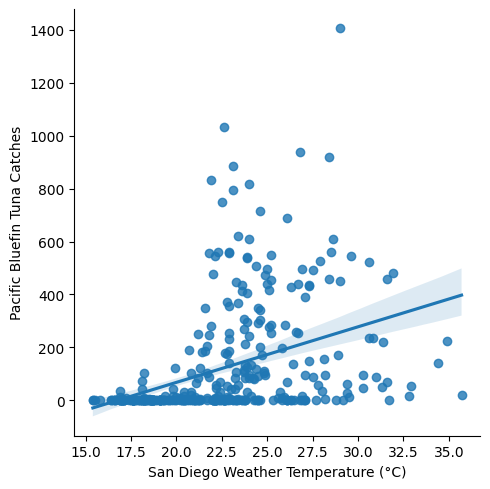

In [7]:
#Plots a correlation scatter plot for daily weather vs. catches in 2020
sns.lmplot(x='San Diego Weather Temperature (°C)', y='Pacific Bluefin Tuna Catches', data=catches_weather_df)

In [8]:
#Demonstrates correlation
catches_weather_df.corr()

,Pacific Bluefin Tuna Catches,San Diego Weather Temperature (°C)
Pacific Bluefin Tuna Catches,1.00000,0.39069
San Diego Weather Temperature (°C),0.39069,1.00000


In order to explore the relationship between Pacific Bluefin Tuna catches and weather temperatures, we analyze the daily max temperatures in San Diego in 2020.

Surprisingly, while the warmer temperatures do slightly indicate increased catches, the warmest months (September and October) do not correlate with the peeak fishing season (July and August).

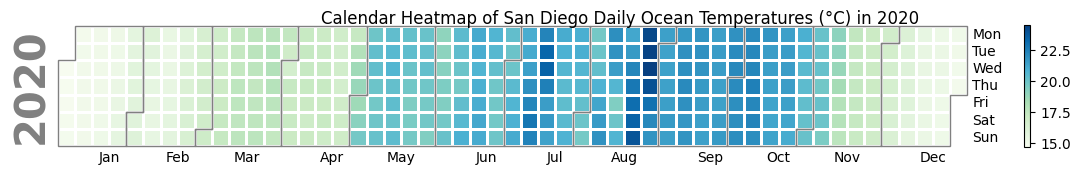

In [30]:
#Correlation between Water temp and Air temp graph here
water_temp_data = pd.read_csv('/content/driver/MyDrive/BFTunaData/noaa_ocean_temps_sd_2020_v2.csv')
air_temp_data = pd.read_csv('/content/driver/MyDrive/BFTunaData/sd-weather_2020-01-01_2020-12-31.csv', usecols=[2])

#Creates a date column combining the day, month, and year
water_temp_data['datetime'] = pd.to_datetime(water_temp_data[['day', 'month', 'year']])

#Converts '999' values to 'NaN'
water_temp_data['WTMP (degC)'] = water_temp_data['WTMP (degC)'].replace(999, float('nan'))

#Drops NaN values
water_temp_data = water_temp_data.dropna(subset=['WTMP (degC)'])

#Gets the mean water temp per day
water_temp_daily = water_temp_data.groupby(water_temp_data['datetime'].dt.date)['WTMP (degC)'].mean().reset_index()

days = pd.date_range('01/01/2020', periods = 366, freq = 'D')
values = water_temp_daily.iloc[:,1].values.flatten()
values_series = pd.Series(data=values, index=days)

#Plots on a heatmap calendar.
calplot.calplot(values_series, suptitle='Calendar Heatmap of San Diego Daily Ocean Temperatures (°C) in 2020', suptitle_kws={'x': 0.5, 'y': 1.0}, cmap='GnBu', yearlabel_kws={'fontname':'sans-serif'})

plt.show()

warnings.filterwarnings('ignore')

Next, we investigate the correlation between daily weather temperatures off the coast of San Diego and sea surface temperatures off the coast of San Diego.

In [ ]:
#Creates a dataframe of weather data to dates.
air_date_data = pd.read_csv('/content/driver/MyDrive/BFTunaData/sd-weather_2020-01-01_2020-12-31.csv', usecols=[1,2])
air_date_data['datetime'] = air_date_data['datetime'].astype('datetime64')
air_date_data.info()
air_date_data.head()

In [ ]:
water_temp_data.info()
water_temp_data.head()

In [ ]:
air_date_data = pd.read_csv('/content/driver/MyDrive/BFTunaData/sd-weather_2020-01-01_2020-12-31.csv', usecols=[1,2])
print(air_date_data.info())

In [ ]:
air_temp_data.info()

In [14]:
air_date_data = pd.read_csv('/content/driver/MyDrive/BFTunaData/sd-weather_2020-01-01_2020-12-31.csv', usecols=[1,2])
air_date_data['datetime'] = air_date_data['datetime'].astype('datetime64')

#Merges the weather data to ocean temperature data.
merged_water_air = pd.merge(water_temp_data, air_date_data, on='datetime', how='left')
merged_water_air = merged_water_air.drop_duplicates(subset='datetime')

water_weather_df = pd.DataFrame({'date':merged_water_air['datetime'], 'Sea Surface Temperature (°C) Off the Coast of San Diego':merged_water_air['WTMP (degC)'], 'San Diego Weather Temperature (°C)':merged_water_air['tempmax']})

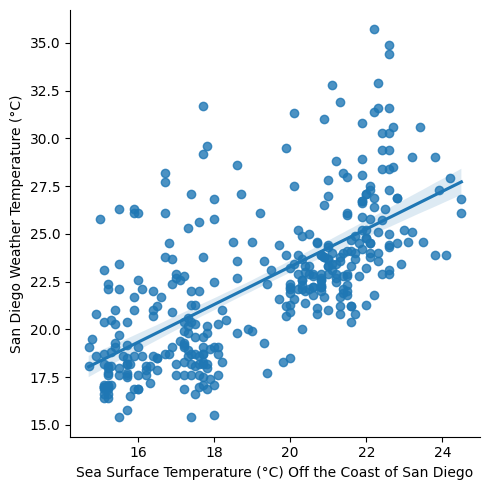

In [16]:
sns.lmplot(x='Sea Surface Temperature (°C) Off the Coast of San Diego', y='San Diego Weather Temperature (°C)', data=water_weather_df)

In [17]:
water_weather_df.describe()

,Sea Surface Temperature (°C) Off the Coast of San Diego,San Diego Weather Temperature (°C)
count,366.000000,366.000000
mean,19.109836,22.400546
std,2.629790,3.935668
min,14.700000,15.400000
25%,16.900000,19.100000
50%,19.600000,22.250000
75%,21.400000,24.575000
max,24.500000,35.700000


In [18]:
water_weather_df.corr()

,Sea Surface Temperature (°C) Off the Coast of San Diego,San Diego Weather Temperature (°C)
Sea Surface Temperature (°C) Off the Coast of San Diego,1.000000,0.659311
San Diego Weather Temperature (°C),0.659311,1.000000


The analysis reveals a strong positive correlation between weather and sea surface temperatures, indicating that the summer season is the most optimal time to fish for Pacific Bluefin Tuna.

Next, we investigate the correlation between Pacific Bluefin Tuna catches specifically and sea surface temperatures off the coast of San Diego in order to reliably pinpoint the best time to fish for Pacific Bluefin in the summer.

In [ ]:
water_temp_data.info()

In [ ]:
catches.info()

In [21]:
#Merge catches data with ocean temperatures data.
merged_catches_water = pd.merge(catches, water_temp_data, on='datetime', how='left')
merged_catches_water = merged_catches_water.drop_duplicates(subset='datetime')

catches_water_temp_df = pd.DataFrame({'date':merged_catches_water['datetime'], 'Sea Surface Temperature (°C) Off the Coast of San Diego':merged_catches_water['WTMP (degC)'], 'Pacific Bluefin Tuna Catches':merged_catches_water['PBF']})

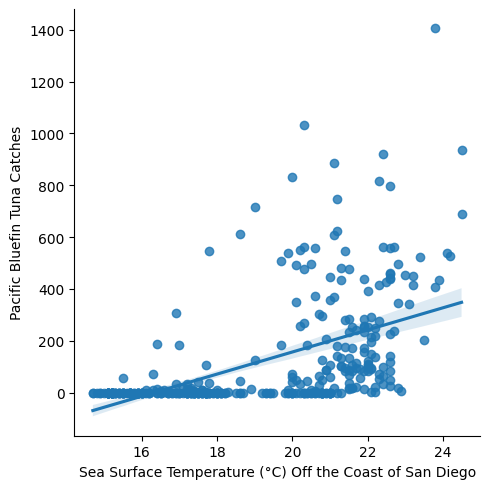

In [22]:
sns.lmplot(x='Sea Surface Temperature (°C) Off the Coast of San Diego', y='Pacific Bluefin Tuna Catches', data=catches_water_temp_df)

In [23]:
catches_water_temp_df.describe()

,Sea Surface Temperature (°C) Off the Coast of San Diego,Pacific Bluefin Tuna Catches
count,366.000000,366.000000
mean,19.109836,118.286885
std,2.629790,211.470681
min,14.700000,0.000000
25%,16.900000,0.000000
50%,19.600000,0.000000
75%,21.400000,136.500000
max,24.500000,1405.000000


In [24]:
catches_water_temp_df.corr()

,Sea Surface Temperature (°C) Off the Coast of San Diego,Pacific Bluefin Tuna Catches
Sea Surface Temperature (°C) Off the Coast of San Diego,1.000000,0.529929
Pacific Bluefin Tuna Catches,0.529929,1.000000


The analysis reveals a strong positive correlation between Pacific Bluefin Tuna catches and sea surface temperature and emphasizes the preference of Pacific Bluefin Tuna for sea surface temperatures above 20 °C, with the greatest population surfacing when sea surface temperatures rise above 22.5 °C.  

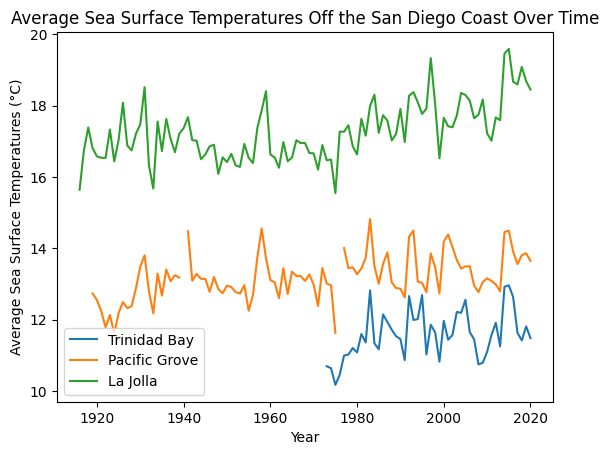

In [25]:
#Sea Surface Temperatures Off the Coast of San Diego specifically over the last 100+ years
ocean_over_time = pd.read_csv('/content/driver/MyDrive/BFTunaData/ocean_temps_over-time.csv')

#Converts data into celsius
ocean_over_time['Trinidad Bay (°C)'] = (ocean_over_time['Trinidad Bay (°F)'] - 32) * 5/9
ocean_over_time['Pacific Grove (°C)'] = (ocean_over_time['Pacific Grove (°F)'] - 32) * 5/9
ocean_over_time['La Jolla (°C)'] = (ocean_over_time['La Jolla (°F)'] - 32) * 5/9

#Plots the temperatures on the graph
plt.plot(ocean_over_time['Year'], ocean_over_time['Trinidad Bay (°C)'], label='Trinidad Bay')
plt.plot(ocean_over_time['Year'], ocean_over_time['Pacific Grove (°C)'], label='Pacific Grove')
plt.plot(ocean_over_time['Year'], ocean_over_time['La Jolla (°C)'], label='La Jolla')

#Labels graph
plt.xlabel('Year')
plt.ylabel('Average Sea Surface Temperatures (°C)')
plt.title('Average Sea Surface Temperatures Off the San Diego Coast Over Time')

plt.legend()
plt.show()

Lastly, to gain insights into long-term trends, we examine sea surface temperatures over the last century. The graph illustrates a significant rise in temperatures, highlight the warming trend along the San Diego coast from 1916 to 2020.

##Conclusion
This comprehensive analysis sheds light on the most optimal conditions for Pacific Bluefin Tuna sportfishing. It is important to consider both weather temperatures for seasonality and sea surface temperatures for better Pacific Bluefin Tuna presence accuracy in order to aid fishermen with data that allows them to plan their expeditions strategically. As sea surface temperatures continue to rise off the coast of San Diego, we can assume that the season for high volume Pacific Bluefin Tuna catches will expand beyond July and August in the coming years.